In [1]:
import pandas as pd
import numpy as np

In [2]:
# prompt: give code to connect with google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load dataset
amazon_food_data = pd.read_csv('/content/drive/My Drive/Amazon-Food-Reviews.csv')

In [5]:
amazon_food_data.head()

,Score,Summary,Text
0,1,"Great product, terrible price",Do not buy at this price! There are a dozen r...
1,1,Not impressed at ALL,"This product was not HORRIBLE, but I feel chea..."
2,1,Don't order from Amazon!,My dog loves this food and when I saw it here ...
3,1,"Maybe good cracker, but package was damaged","This may be a good cracker, but I had to retur..."
4,1,"Great rice, price is such a rip-off","It is a great product, however, who would spen..."


In [7]:
# Convert Score to Positive (4, 5) and Negative (1, 2, 3)
amazon_food_data['Sentiment'] = amazon_food_data['Score'].apply(lambda x: 'Positive' if x > 3 else 'Negative')

# Display the first few rows to verify the changes
print(amazon_food_data.head())

   Score                                      Summary  \
0      1                Great product, terrible price   
1      1                         Not impressed at ALL   
2      1                     Don't order from Amazon!   
3      1  Maybe good cracker, but package was damaged   
4      1          Great rice, price is such a rip-off   

                                                Text Sentiment  
0  Do not buy at this price!  There are a dozen r...  Negative  
1  This product was not HORRIBLE, but I feel chea...  Negative  
2  My dog loves this food and when I saw it here ...  Negative  
3  This may be a good cracker, but I had to retur...  Negative  
4  It is a great product, however, who would spen...  Negative  


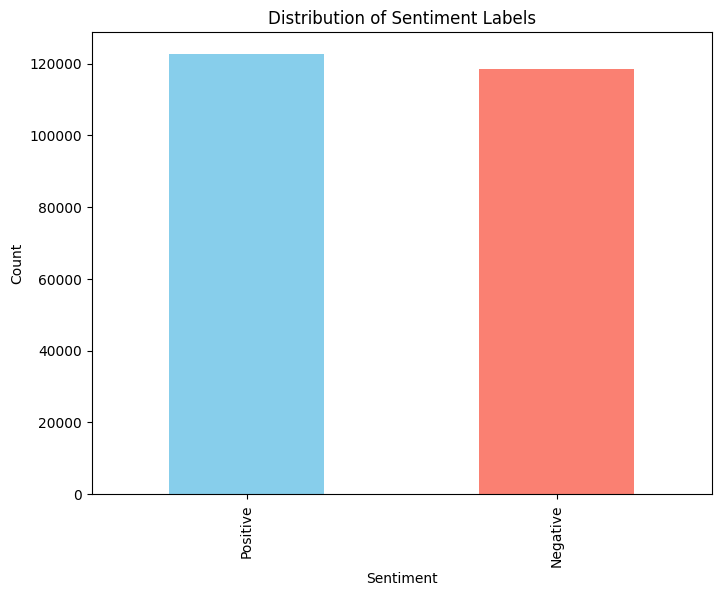

In [8]:
import matplotlib.pyplot as amazon_food_plt
# Plot distribution of Positive and Negative labels
sentiment_counts = amazon_food_data['Sentiment'].value_counts()
amazon_food_plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
amazon_food_plt.title('Distribution of Sentiment Labels')
amazon_food_plt.xlabel('Sentiment')
amazon_food_plt.ylabel('Count')
amazon_food_plt.show()

In [9]:
# Balance the dataset to have 7500 samples for each class
positive_samples = amazon_food_data[amazon_food_data['Sentiment'] == 'Positive'].sample(n=7500, random_state=42)
negative_samples = amazon_food_data[amazon_food_data['Sentiment'] == 'Negative'].sample(n=7500, random_state=42)

# Combine balanced data
balanced_data = pd.concat([positive_samples, negative_samples]).reset_index(drop=True)

# Verify the balanced dataset
print(balanced_data['Sentiment'].value_counts())

# Save the balanced dataset to a new CSV (optional)
balanced_data.to_csv('/content/drive/My Drive/Amazon-Food-Reviews-Balanced.csv', index=False)

Sentiment
Positive    7500
Negative    7500
Name: count, dtype: int64


In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove words with 2 or fewer characters
    text = ' '.join([word for word in text.split() if len(word) > 2])
    return text

# Apply the preprocessing function to the Text column
balanced_data['Processed_Text'] = balanced_data['Text'].apply(preprocess_text)

# Display the first few rows to verify
print(balanced_data[['Text', 'Processed_Text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                Text  \
0  I highly recommend this tasty product to help ...   
1  I'm not here to bs anyone.  This Tropical Frui...   
2  Taste like sweet butter corn that melts in my ...   
3  The Terra Sweet Potato chips are a delicious a...   
4  Finally some great coffee, thank goodness Star...   

                                      Processed_Text  
0  highly recommend this tasty product help lower...  
1  not here anyone this tropical fruit salad from...  
2  taste like sweet butter corn that melts mouth ...  
3  the terra sweet potato chips are delicious all...  
4  finally some great coffee thank goodness starb...  


In [11]:
balanced_data[['Text', 'Processed_Text']].head()

,Text,Processed_Text
0,I highly recommend this tasty product to help ...,highly recommend this tasty product help lower...
1,I'm not here to bs anyone. This Tropical Frui...,not here anyone this tropical fruit salad from...
2,Taste like sweet butter corn that melts in my ...,taste like sweet butter corn that melts mouth ...
3,The Terra Sweet Potato chips are a delicious a...,the terra sweet potato chips are delicious all...
4,"Finally some great coffee, thank goodness Star...",finally some great coffee thank goodness starb...


In [12]:
# Initialize the Porter stemmer
stemmer = PorterStemmer()

# Define function to remove stop words and apply stemming
def remove_stopwords_and_stem(text):
    # Remove stop words and apply stemming
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

# Apply the function to the Processed_Text column
balanced_data['Processed_Text'] = balanced_data['Processed_Text'].apply(remove_stopwords_and_stem)

# Display the first few rows to verify
balanced_data[['Text', 'Processed_Text']].head()


,Text,Processed_Text
0,I highly recommend this tasty product to help ...,highli recommend tasti product help lower chol...
1,I'm not here to bs anyone. This Tropical Frui...,anyon tropic fruit salad roland absolut best i...
2,Taste like sweet butter corn that melts in my ...,tast like sweet butter corn melt mouth given n...
3,The Terra Sweet Potato chips are a delicious a...,terra sweet potato chip delici allnatur snackb...
4,"Finally some great coffee, thank goodness Star...",final great coffe thank good starbuck final ga...


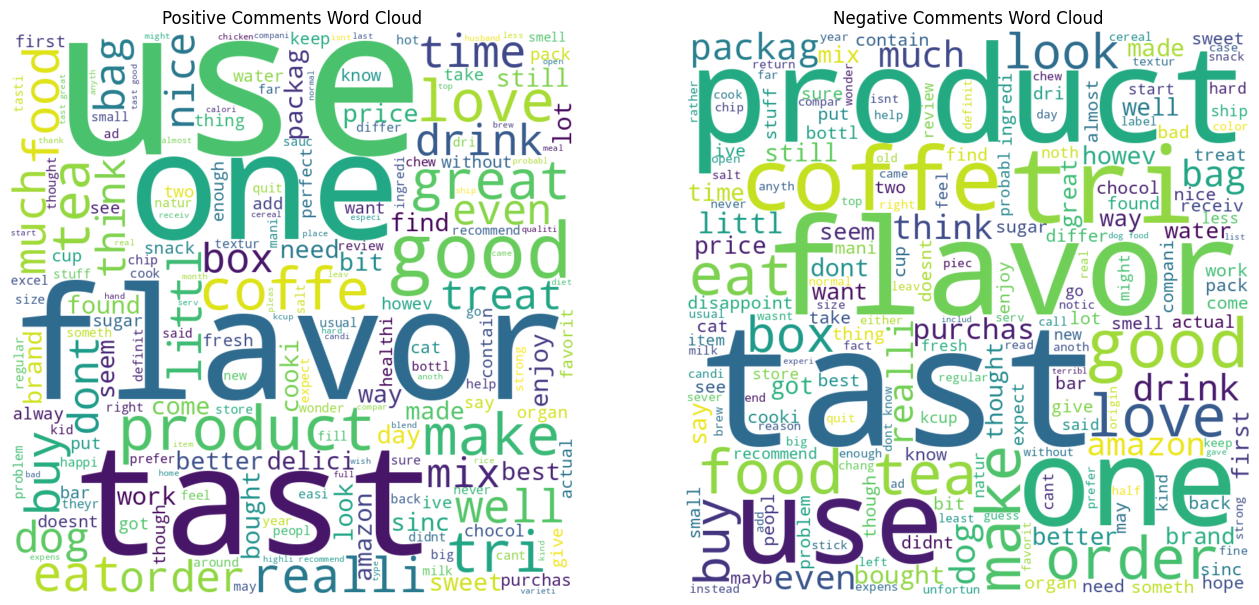

In [13]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Separate positive and negative comments
positive_comments = " ".join(balanced_data[balanced_data['Sentiment'] == 'Positive']['Processed_Text'])
negative_comments = " ".join(balanced_data[balanced_data['Sentiment'] == 'Negative']['Processed_Text'])


# Generate word cloud for positive comments
wordcloud_positive = WordCloud(width=800, height=800, background_color="white",
                               contour_width=1, contour_color="green").generate(positive_comments)

# Generate word cloud for negative comments
wordcloud_negative = WordCloud(width=800, height=800, background_color="white",
                               contour_width=1, contour_color="red").generate(negative_comments)

# Plot the word clouds side by side
plt.figure(figsize=(16, 8))

# Display positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Positive Comments Word Cloud")
plt.axis("off")

# Display negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Negative Comments Word Cloud")
plt.axis("off")

plt.show()


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming 'Processed_Text' column contains the cleaned text data after preprocessing
# Define the TF-IDF Vectorizer with a limit on the maximum features for dimensionality reduction
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Use top 5000 terms for example

# Apply TF-IDF to the processed text data
X = tfidf_vectorizer.fit_transform(balanced_data['Processed_Text']).toarray()
y = balanced_data['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0).values  # Convert labels to binary

# Print the shape of the feature matrix to confirm dimensions
print(f"TF-IDF feature matrix shape: {X.shape}")


TF-IDF feature matrix shape: (15000, 5000)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7983
Precision: 0.8031
Recall: 0.7930
F1 Score: 0.7980


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
max_words = 5000  # Vocabulary size
max_len = 100  # Maximum sequence length

# Tokenize the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(balanced_data['Processed_Text'])
X = tokenizer.texts_to_sequences(balanced_data['Processed_Text'])
X = pad_sequences(X, maxlen=max_len)

# Convert labels to binary
y = balanced_data['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0).values

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# CNN Model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
cnn_model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(10, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"CNN Accuracy: {cnn_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.6845 - loss: 0.6050 - val_accuracy: 0.7980 - val_loss: 0.4452
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.8571 - loss: 0.3412 - val_accuracy: 0.7887 - val_loss: 0.4764
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.9347 - loss: 0.1943 - val_accuracy: 0.7963 - val_loss: 0.4974
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.9861 - loss: 0.0698 - val_accuracy: 0.7917 - val_loss: 0.5883
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9977 - loss: 0.0227 - val_accuracy: 0.7943 - val_loss: 0.6939
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7973 - loss: 0.7068
CNN Accuracy: 0.7943
